In [10]:
import spikeinterface.extractors as se
import spikeinterface.widgets as sw
import spikeinterface as si
import spikeinterface.sorters as ss
import matplotlib.pyplot as plt
import spikeinterface.preprocessing as spre
import mne
import numpy as np
ss.installed_sorters()

RUNNING SHELL SCRIPT: /var/folders/b9/7_m2371s7kb06rs8rjjwkqj40000gn/T/tmp_shellscriptyaao5m9p/script.sh
RUNNING SHELL SCRIPT: /var/folders/b9/7_m2371s7kb06rs8rjjwkqj40000gn/T/tmp_shellscriptow1plv_9/script.sh
RUNNING SHELL SCRIPT: /var/folders/b9/7_m2371s7kb06rs8rjjwkqj40000gn/T/tmp_shellscriptfaz6gxum/script.sh
RUNNING SHELL SCRIPT: /var/folders/b9/7_m2371s7kb06rs8rjjwkqj40000gn/T/tmp_shellscriptujosm3ht/script.sh
RUNNING SHELL SCRIPT: /var/folders/b9/7_m2371s7kb06rs8rjjwkqj40000gn/T/tmp_shellscriptmkojedlr/script.sh
RUNNING SHELL SCRIPT: /var/folders/b9/7_m2371s7kb06rs8rjjwkqj40000gn/T/tmp_shellscript4xzt2uks/script.sh
RUNNING SHELL SCRIPT: /var/folders/b9/7_m2371s7kb06rs8rjjwkqj40000gn/T/tmp_shellscriptcm9e2vxf/script.sh
RUNNING SHELL SCRIPT: /var/folders/b9/7_m2371s7kb06rs8rjjwkqj40000gn/T/tmp_shellscript87ho3k07/script.sh


['spykingcircus2', 'tridesclous', 'tridesclous2']

In [17]:
recording = se.BinaryRecordingExtractor('/Volumes/Projects/revision/EDF/d2-b2/d2_b2_WT4.raw',10000,14,'float32')
recording

BinaryRecordingExtractor: 14 channels - 1 segments - 10.0kHz - 1590.570s
  file_paths: ['/Volumes/Projects/revision/EDF/d2-b2/d2_b2_WT4.raw']

(<matplotlib.collections.PolyCollection at 0x7f89ec974730>,
 <matplotlib.collections.PolyCollection at 0x7f89c9290fd0>)

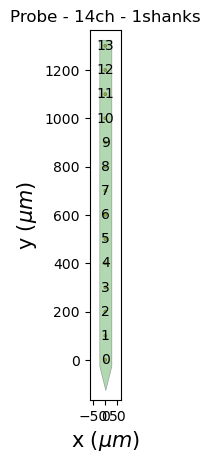

In [18]:
from probeinterface import generate_linear_probe
from probeinterface.plotting import plot_probe, plot_probe_group
linear_probe = generate_linear_probe(num_elec=14, ypitch=100)
linear_probe.set_device_channel_indices(np.arange(14))
recording = recording.set_probe(linear_probe)
plot_probe(linear_probe, with_channel_index=True)

In [19]:
default_TDC_params = ss.TridesclousSorter.default_params()
default_TDC_params['detect_threshold'] = 4
default_TDC_params['common_ref_removal'] = 'True'
print(default_TDC_params)

{'freq_min': 400.0, 'freq_max': 5000.0, 'detect_sign': -1, 'detect_threshold': 4, 'common_ref_removal': 'True', 'nested_params': None, 'n_jobs': 1, 'total_memory': None, 'chunk_size': None, 'chunk_memory': None, 'chunk_duration': '1s', 'progress_bar': True}


In [20]:
recording = spre.highpass_filter(recording, freq_min=300)
recording = spre.common_reference(recording)
sorting_TDC_5 = ss.run_tridesclous(recording=recording)
sorting_TDC_5.get_unit_ids()

array([0, 1])

In [21]:
folder = 'waveforms_mearec'
we = si.extract_waveforms(recording, sorting_TDC_5,folder)
print(we)

Setting 'return_scaled' to False
WaveformExtractor: 14 channels - 2 units - 1 segments
  before:30 after:40 n_per_units:500


In [22]:
from spikeinterface.exporters import export_to_phy
output_folder = '/Volumes/Projects/revision/WT4_D2'
export_to_phy(we, output_folder)

write_binary_recording with n_jobs = 1 and chunk_size = None
Setting 'return_scaled' to False
Run:
phy template-gui  /Volumes/Projects/revision/WT4_D2/params.py
